In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from sklearn import linear_model
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
def word_count(txt):
    distinguish_word = ""
    total_count = 0
    distinguish_count = 0
    for word in txt:
        total_count = total_count + 1
        if word not in distinguish_word:
            distinguish_word = distinguish_word + ' ' + word
            distinguish_count = distinguish_count +1
    return total_count

In [9]:
def diff_word_count(txt):
    distinguish_word = ""
    totel_count = 0
    distinguish_count = 0
    for word in txt:
        totel_count = totel_count + 1
        if word not in distinguish_word:
            distinguish_word = distinguish_word + ' ' + word
            distinguish_count = distinguish_count +1
    return distinguish_count

In [33]:
dir_path = os.path.join(os.getcwd(), 'vnexpress')
categories = list()

data = list()
for directory in os.listdir(dir_path):
#     print(directory)
    if '.' not in directory:
        list_file_path = os.path.join(dir_path, directory)
        count = 0
        for file_name in os.listdir(list_file_path):
            data_dict = dict()
            data_dict['filename'] = file_name
            data_dict['category'] = directory
            file_path = os.path.join(list_file_path, file_name)
            file = open(file_path,'r')
            data_dict['data'] = file.read()
            data.append(data_dict)
data_df = pd.DataFrame(data)

In [34]:
data_df['distinguish_word'] = data_df.data.apply(lambda row:diff_word_count(row))
data_df['total_count'] = data_df.data.apply(lambda row:word_count(row))

In [35]:
data_df['Doc_ID'] = data_df.index

In [36]:
data_character_df = data_df[['category','Doc_ID','distinguish_word','total_count']]
data_character_df.to_csv('data_character_df.csv')

In [37]:
max_count = max(data_character_df['total_count'])

In [38]:
print(data_df['filename'].loc[data_df.total_count == max_count])

18144    cuc-thue-tp-hcm-khong-phai-ca-nhan-nao-cung-la...
Name: filename, dtype: object


In [14]:
import matplotlib.pyplot as plt

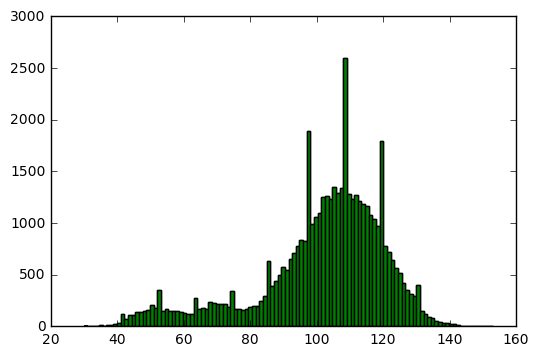

In [18]:
plt.hist(data_character_df['distinguish_word'], bins ='auto')  # plt.hist passes it's arguments to np.histogram
plt.show()

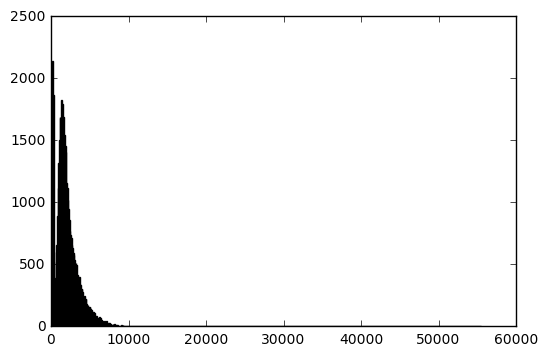

In [19]:
plt.hist(data_character_df['total_count'], bins ='auto')  # plt.hist passes it's arguments to np.histogram
plt.show()

In [39]:
training_df = data_df.loc[data_df['distinguish_word']>90]

In [40]:
training_df.shape

(37604, 6)